In [38]:
import qiskit
import qiskit.visualization
from time import sleep
%matplotlib inline

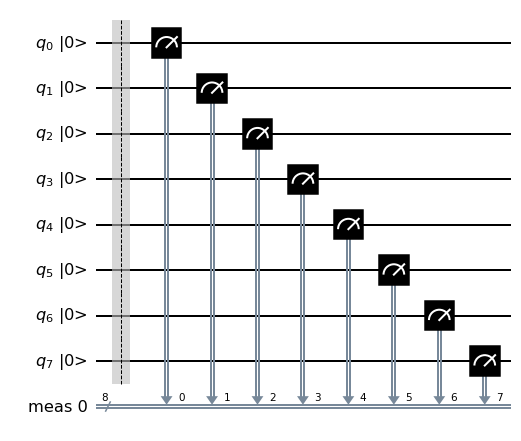

In [2]:
qc_output = qiskit.QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(output = 'mpl',initial_state=True)

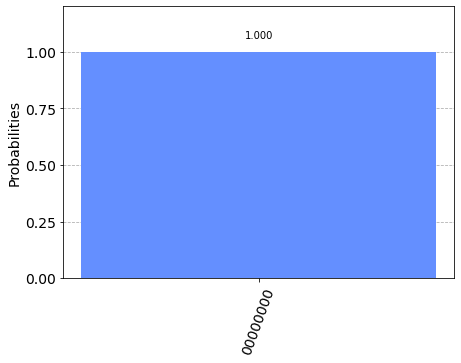

In [3]:
#Simuluate (Should all just be |0>)
sim = qiskit.Aer.get_backend("aer_simulator")
result = sim.run(qc_output).result()
counts = result.get_counts()
qiskit.visualization.plot_histogram(counts)

### Now Making an Encoder Circuit with NOT (x) gates

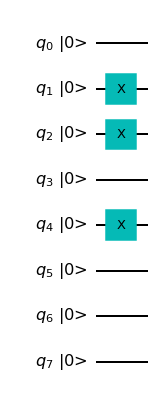

In [4]:
qc_encode = qiskit.QuantumCircuit(8)
qc_encode.x(4)
qc_encode.x(2)
qc_encode.x(1)
qc_encode.draw(output='mpl', initial_state=True)

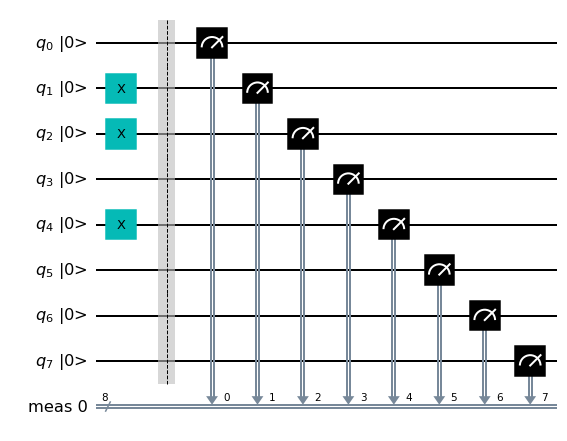

In [5]:
qc_encode.measure_all()
qc_encode.draw(output='mpl', initial_state=True)

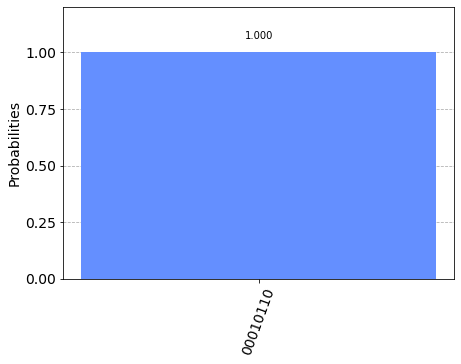

In [6]:
#My age in binary!
sim = qiskit.Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()
qiskit.visualization.plot_histogram(counts)

### Now a 2 bit Half Adder

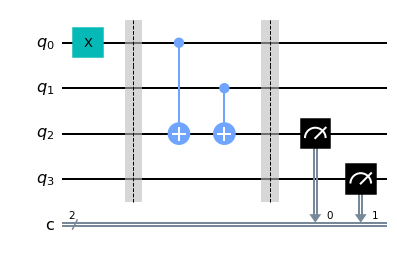

In [7]:
half_adder = qiskit.QuantumCircuit(4,2)
half_adder.x(0)
half_adder.barrier()

#adding for output bit 0
half_adder.cx(0,2)
half_adder.cx(1,2)



half_adder.barrier()
half_adder.measure([2,3],[0,1])
half_adder.draw(output='mpl')

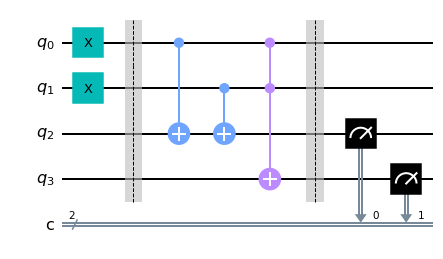

In [8]:
#Two bit half adder:

'''
Does this
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10'''

half_adder = qiskit.QuantumCircuit(4,2)
half_adder.x(0)
half_adder.x(1)
half_adder.barrier()

#adding for output bit 0
half_adder.cx(0,2)
half_adder.cx(1,2)

#For output bit 1
half_adder.ccx(0,1,3)

#Measurements
half_adder.barrier()
half_adder.measure([2,3],[0,1])
half_adder.draw(output='mpl')

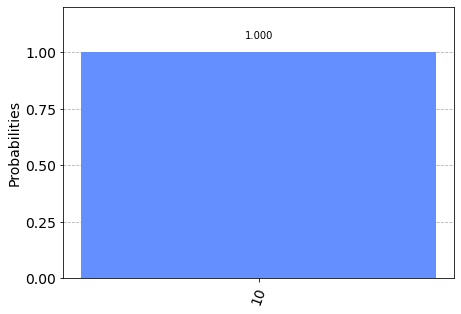

In [9]:
sim = qiskit.Aer.get_backend('aer_simulator')
result = sim.run(half_adder).result()
counts = result.get_counts()
qiskit.visualization.plot_histogram(counts)

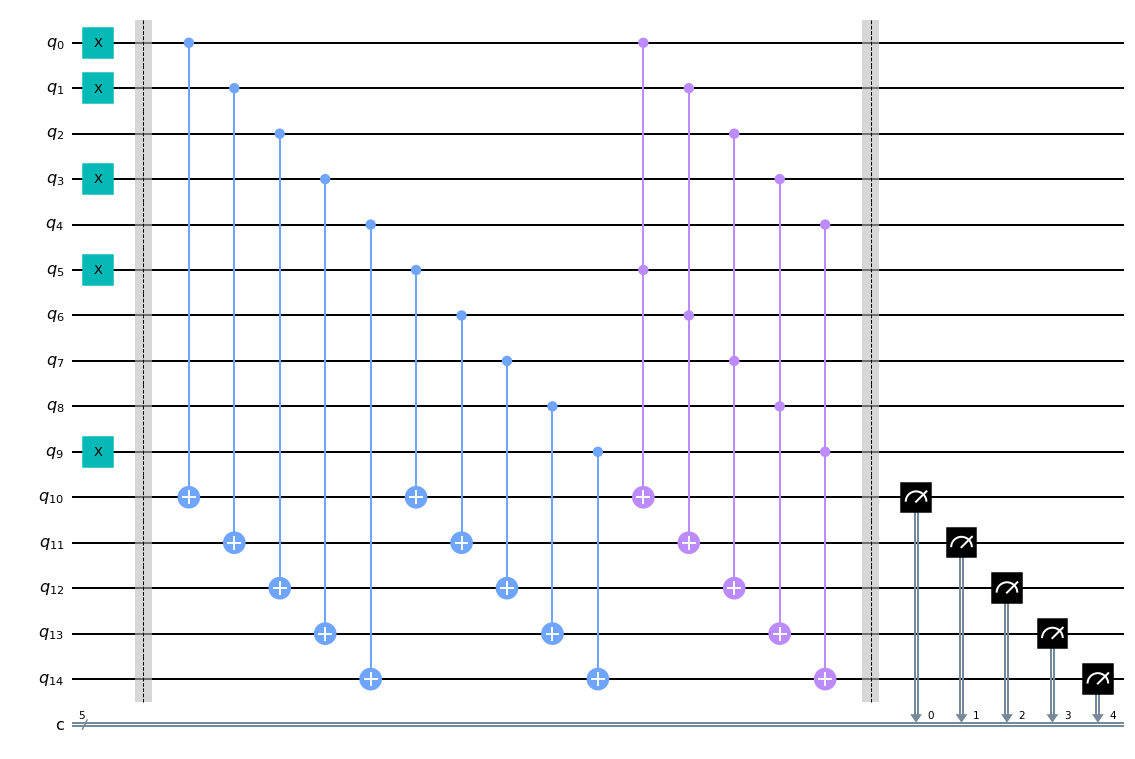

27

In [33]:
#Three bit adder:

def binary_half_adder(num_1, num_2):
    if len(num_1) != len(num_2):
        return 'mismatch lengths'
        
    else:
        adder = qiskit.QuantumCircuit(len(num_1)*3,len(num_1))
        for i in range(len(num_1)):
            if num_1[i] == '1':
                adder.x(i)
            if num_2[i] == '1':
                adder.x((i+len(num_1)))
        #Make the 2 bit adders:
        adder.barrier()
        for i in range(len(num_1)):
            adder.cx([i,(i+len(num_2))],[i+(2*len(num_2)),i+(2*len(num_2))])
            adder.ccx(i, i+len(num_2), i+2*len(num_2))
            #adder.cx((i+len(num_2)), i+(2*len(num_2)))
        adder.barrier()
        
        #Measurements
        for i in range(len(num_1)):
            adder.measure(i+2*len(num_1),i)
        
        #simulate and get output
        sim = qiskit.Aer.get_backend('aer_simulator')
        result = sim.run(adder).result() 
        counts = result.get_counts()
        display(adder.draw(output='mpl'))
    return int(list(counts.keys())[0], 2)

binary_half_adder('11010','10001')

In [47]:
def binary_half_adder(num_1, num_2):
    if len(num_1) != len(num_2):
        return 'mismatch lengths'
        
    else:
        reg_1 = qiskit.QuantumRegister(len(num_1), 'in_1')
        reg_2 = qiskit.QuantumRegister(len(num_2), 'in_2')
        reg_out = qiskit.QuantumRegister(len(num_2), 'out')
        reg_c = qiskit.ClassicalRegister(len(num_1), 'c')
        adder = qiskit.QuantumCircuit(reg_1,reg_2,reg_out,reg_c)
        
        for i in range(len(num_1)):
            if num_1[i] == '1':
                adder.x(reg_1[i])
            if num_2[i] == '1':
                adder.x(reg_2[i])
                
        #Make the 2 bit adders:
        adder.barrier()
        for q in range(len(reg_1)):
            adder.cx([reg_1[q],reg_2[q]],[reg_out[q],reg_out[q]])
            adder.ccx(reg_1[q], reg_2[q], reg_out[q])
            adder.barrier()
                    
        #Measurements
        for q in range(len(reg_out)):
            adder.measure(reg_out[q],reg_c[q])
        
        #display(adder.draw(output='mpl', filename='adder.png'))
        #simulate and get output
        sim = qiskit.Aer.get_backend('aer_simulator')
        result = sim.run(adder).result() 
        counts = result.get_counts()
    return int(list(counts.keys())[0], 2)

binary_half_adder('10', '01')

3